In [1]:
import psycopg2

__Create a connection to the database, get a cursor, and set autocommit to true__

In [2]:
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=udacity user=postgres password=******")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)
conn.set_session(autocommit=True)

#### Let's imagine we have a table called Music Store. 

`Table Name: music_store
column 0: Transaction Id
column 1: Customer Name
column 2: Cashier Name
column 3: Year 
column 4: Albums Purchased`


## Now to translate this information into a CREATE Table Statement and insert the data

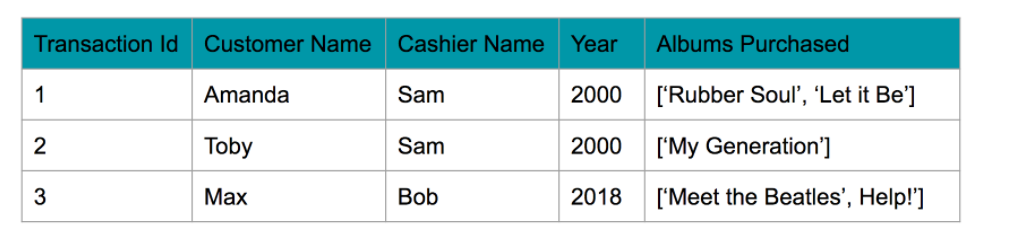

In [4]:
data_tuples = ((1, "Amanda", "Sam", 2000, ["Rubber Soul", "Let It Be"]),
              (2, "Toby", "Sam", 2000, ["My, generation"]),
              (3, "Max", "Bob", 2018, ["Meet the Beatles", "Help!"]))

# Create table music_store
try:
    cur.execute("CREATE TABLE IF NOT EXISTS music_store (transaction_id int, customer_name varchar, \
                cashier_name varchar, year int, albums_purchased text[])")
except psycopg2.Error as e:
    print(e)
    
# Insert data_tuples in the music_store
try:
    cur.executemany("INSERT INTO music_store (transaction_id, customer_name, cashier_name, year, albums_purchased) \
                    VALUES (%s, %s, %s, %s, %s)", data_tuples)
except psycopg2.Error as e:
    print(e)

In [7]:
# Lets query the music_store table
try:
    cur.execute("SELECT * FROM music_store")
except psycopg2.Error as e:
    print(e)
    
for row in cur.fetchall():
    print(row)

(1, 'Amanda', 'Sam', 2000, ['Rubber Soul', 'Let It Be'])
(2, 'Toby', 'Sam', 2000, ['My, generation'])
(3, 'Max', 'Bob', 2018, ['Meet the Beatles', 'Help!'])


- The albums_purchased columns is not atomic in nature. Therefore, we tend to list out the elements to occupy each cell in the 
albums_purchased columns

#### Lets make the music_store into 1NF music_store2 table


In [8]:
data_tuples = ((1, "Amanda", "Sam", 2000, "Let It Be"),
               (1, "Amanda", "Sam", 2000, "Rubber Soul"),
              (2, "Toby", "Sam", 2000, "My generation"),
              (3, "Max", "Bob", 2018, "Help!"),
               (3, "Max", "Bob", 2018, "Meet the Beatles"))

# Create table music_store
try:
    cur.execute("CREATE TABLE IF NOT EXISTS music_store2 (transaction_id int, customer_name varchar, \
                cashier_name varchar, year int, albums_purchased varchar)")
except psycopg2.Error as e:
    print(e)
    
# Insert data_tuples in the music_store
try:
    cur.executemany("INSERT INTO music_store2 (transaction_id, customer_name, cashier_name, year, albums_purchased) \
                    VALUES (%s, %s, %s, %s, %s)", data_tuples)
except psycopg2.Error as e:
    print(e)
    
# Lets query the music_store table
try:
    cur.execute("SELECT * FROM music_store2")
except psycopg2.Error as e:
    print(e)
    
for row in cur.fetchall():
    print(row)

(1, 'Amanda', 'Sam', 2000, 'Let It Be')
(1, 'Amanda', 'Sam', 2000, 'Rubber Soul')
(2, 'Toby', 'Sam', 2000, 'My generation')
(3, 'Max', 'Bob', 2018, 'Help!')
(3, 'Max', 'Bob', 2018, 'Meet the Beatles')


#### Moving to 2nd Normal Form (2NF)
You have now moved the data into 1NF, which is the first step in moving to 2nd Normal Form. The table is not yet in 2nd Normal Form. While each of the records in the table is unique, our Primary key (transaction id) is not unique. 

#### Break up the table into two tables, transactions and albums sold. 

In [3]:
# Create a transactions table
try:
    cur.execute("CREATE TABLE IF NOT EXISTS transactions (transaction_id int, customer_name varchar, \
                cashier_name varchar, year int)")
except psycopg2.Error as e:
    print(e)
    
# Create album_solds table
try:
    cur.execute("CREATE TABLE IF NOT EXISTS albums_sold (song_id int, transaction_id int, albums_purchased varchar)")
except psycopg2.Error as e:
    print(e)

In [5]:
# insert rows in transactions

data_tuple = ((1, 'Amanda', 'Sam', 2000),
                (2, 'Toby', 'Sam', 2000),
                (3, 'Max', 'Bob', 2018)
             )
try:
    cur.executemany("INSERT INTO transactions (transaction_id, customer_name, cashier_name, year) \
                        VALUES (%s, %s, %s, %s)", data_tuple)
except psycopg2.Error as e:
    print(e)

INSERT has more target columns than expressions
LINE 1: ...ons (transaction_id, customer_name, cashier_name, year)     ...
                                                             ^



In [6]:
# Lets query the music_store table
try:
    cur.execute("SELECT * FROM transactions")
except psycopg2.Error as e:
    print(e)
    
for row in cur.fetchall():
    print(row)

(1, 'Amanda', 'Sam', 2000)
(2, 'Toby', 'Sam', 2000)
(3, 'Max', 'Bob', 2018)


In [7]:
# insert rows in albums_sold

data_tuple = ((1, 1, 'Let It Be'),
                (2, 1, 'Rubber Soul'),
                (3, 2, 'My generation'),
              (4, 3, 'Help!'),
              (5, 3, 'Meet the Beatles'))

try:
    cur.executemany("INSERT INTO albums_sold (song_id, transaction_id, albums_purchased) \
                        VALUES (%s, %s, %s)", data_tuple)
except psycopg2.Error as e:
    print(e)

(1, 'Amanda', 'Sam', 2000)
(2, 'Toby', 'Sam', 2000)
(3, 'Max', 'Bob', 2018)


In [8]:
# Lets query the music_store table
try:
    cur.execute("SELECT * FROM albums_sold")
except psycopg2.Error as e:
    print(e)
    
for row in cur.fetchall():
    print(row)

(1, 1, 'Let It Be')
(2, 1, 'Rubber Soul')
(3, 2, 'My generation')
(4, 3, 'Help!')
(5, 3, 'Meet the Beatles')


#### Lets do JOIN on transaction and albums_sold table

In [9]:
try:
    cur.execute("SELECT * \
                FROM transactions JOIN albums_sold ON transactions.transaction_id = albums_sold.transaction_id")
except psycopg2.Error as e:
    print(e)
    
for row in cur.fetchall():
    print(row)

(1, 'Amanda', 'Sam', 2000, 1, 1, 'Let It Be')
(1, 'Amanda', 'Sam', 2000, 2, 1, 'Rubber Soul')
(2, 'Toby', 'Sam', 2000, 3, 2, 'My generation')
(3, 'Max', 'Bob', 2018, 4, 3, 'Help!')
(3, 'Max', 'Bob', 2018, 5, 3, 'Meet the Beatles')


#### Moving to 3rd Normal Form (3NF)
Check our table for any transitive dependencies. 
_HINT:_ Check the table for any transitive dependencies. _Transactions_ can remove _Cashier Name_ to its own table, called _Employees_, which will leave us with 3 tables. 

Therefore, we make 2 tables from transactions named __transactions2__ and __employee__

In [20]:
# Create transactions2 and employee table

try:
    cur.execute("CREATE TABLE IF NOT EXISTS transactions2 (transaction_id int, customer_name varchar, cashier_id int, \
                                                                        year int)")
except psycopg2.Error as e:
    print(e)
    
try:
    cur.execute("CREATE TABLE IF NOT EXISTS employees (cashier_id int, cashier_name varchar)")
except psycopg2.Error as e:
    print(e)

In [21]:
# Insert rows in transactions2 table

data_tuple = ((1, 'Amanda', 1, 2000),
              (2, 'Toby', 1, 2000),
              (3, 'Max', 2, 2018))

try:
    cur.executemany("INSERT INTO transactions2 (transaction_id, customer_name, cashier_id, year) \
                        VALUES (%s, %s, %s, %s)", data_tuple)
except psycopg2.Error as e:
    print(e)
    
# Insert rows in employees table

data_tuple = ((1, "Sam"), (2, "Bob"))

try:
    cur.executemany("INSERT INTO employees (cashier_id, cashier_name) VALUES (%s, %s)", data_tuple)
except psycopg2.Error as e:
    print(e)


In [22]:
print("Transactions2 table:\n")

try:
    cur.execute("SELECT * FROM transactions2")
except psycopg2.Error as e:
    print(e)
    
for row in cur.fetchall():
    print(row)
    
print("\nEmployees table:\n")

try:
    cur.execute("SELECT * FROM employees")
except psycopg2.Error as e:
    print(e)
    
for row in cur.fetchall():
    print(row)

Transactions2 table:

(1, 'Amanda', 1, 2000)
(2, 'Toby', 1, 2000)
(3, 'Max', 2, 2018)

Employees table:

(1, 'Sam')
(2, 'Bob')


## Lets join the 3 tables

In [23]:
try:
    cur.execute("SELECT * \
                FROM transactions2 AS t\
                JOIN employees AS e ON t.cashier_id = e.cashier_id \
                JOIN albums_sold AS a ON a.transaction_id = t.transaction_id")
except psycopg2.Error as e:
    print(e)
    
for row in cur.fetchall():
    print(row)

(1, 'Amanda', 1, 2000, 1, 'Sam', 1, 1, 'Let It Be')
(1, 'Amanda', 1, 2000, 1, 'Sam', 2, 1, 'Rubber Soul')
(2, 'Toby', 1, 2000, 1, 'Sam', 3, 2, 'My generation')
(3, 'Max', 2, 2018, 2, 'Bob', 4, 3, 'Help!')
(3, 'Max', 2, 2018, 2, 'Bob', 5, 3, 'Meet the Beatles')


In [ ]:
try: 
    cur.execute("DROP table music_store")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table music_store2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table albums_sold")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table employees")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

In [24]:
### And finally close your cursor and connection. 

cur.close()
conn.close()